In [1]:
import numpy as np
import pandas as pd

%matplotlib inline

In [3]:
data = pd.read_csv("../data/titanic_train.csv", index_col="PassengerId")

In [5]:
data.head(15)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [7]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# Для примера отберем пассажиров, которые сели в Cherbourg (Embarked=C) и
# заплатили более 200 у.е. за билет (fare > 200).

data[(data["Embarked"] == "C") & (data.Fare > 200)].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C


In [9]:
# Можно отсортировать этих людей по убыванию платы за билет.

data[(data["Embarked"] == "C") & (data["Fare"] > 200)].sort_values(
    by="Fare", ascending=False
).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


In [10]:
def age_category(age): 
    """
    < 30 -> 1
    >= 30, <55 -> 2
    >= 55 -> 3
    """
    if age < 30:
        return 1
    elif age <55:
        return 2
    else:
        return 3

In [11]:
age_categories = [age_category(age) for age in data.Age]

In [15]:
data["Age_category"] = age_categories

In [34]:
#def visitors(Sex):
#    if Sex == male:
 #       return len(data[Sex == male])
  #  if Sex == female:
   #     return len(data[Sex == female])
#visitors = [visitors(data) for sex in data.Sex]

In [16]:
print(data.shape)
print(data.columns.values)

(891, 12)
['Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked' 'Age_category']


In [39]:
data[(data["Sex"] == "male")].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_category
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,3
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,2
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1


In [187]:
data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [40]:
len(data[(data["Sex"] == "male")].head(891))

577

In [41]:
len(data[(data["Sex"] == "female")].head(891))

314

In [54]:
data[(data["Pclass"] == 2)].head(891)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_category
PassengerId,,,,,,,,,,,,
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1
16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S,3
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,3
21,0,2,"Fynney, Mr. Joseph J",male,35.0,0,0,239865,26.0000,NaN,S,2
22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S,2
...,...,...,...,...,...,...,...,...,...,...,...,...
867,1,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,SC/PARIS 2149,13.8583,NaN,C,1
875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C,1
881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S,1


In [53]:
data[(data["Pclass"] == 2) & (data["Sex"] == "male")].head(891)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_category
PassengerId,,,,,,,,,,,,
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0,NaN,S,3
21,0,2,"Fynney, Mr. Joseph J",male,35.0,0,0,239865,26.0,NaN,S,2
22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0,D56,S,2
34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5,NaN,S,3
71,0,2,"Jenkin, Mr. Stephen Curnow",male,32.0,0,0,C.A. 33111,10.5,NaN,S,2
...,...,...,...,...,...,...,...,...,...,...,...,...
849,0,2,"Harper, Rev. John",male,28.0,0,1,248727,33.0,NaN,S,1
862,0,2,"Giles, Mr. Frederick Edward",male,21.0,1,0,28134,11.5,NaN,S,1
865,0,2,"Gill, Mr. John William",male,24.0,0,0,233866,13.0,NaN,S,1


In [59]:
data["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [65]:
data[(data["Sex"] == "male") & (data["Survived"] == 1)].describe()
#data[(data["Pclass"] == 2) & (data["Sex"] == "male")].head(891)

,Survived,Pclass,Age,SibSp,Parch,Fare,Age_category
count,109.0,109.000000,93.000000,109.000000,109.000000,109.000000,109.000000
mean,1.0,2.018349,27.276022,0.385321,0.357798,40.821484,1.715596
std,0.0,0.922774,16.504803,0.636952,0.645826,71.355967,0.758797
min,1.0,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,1.0,1.000000,18.000000,0.000000,0.000000,9.500000,1.000000
50%,1.0,2.000000,28.000000,0.000000,0.000000,26.287500,2.000000
75%,1.0,3.000000,36.000000,1.000000,1.000000,39.000000,2.000000
max,1.0,3.000000,80.000000,4.000000,2.000000,512.329200,3.000000


In [72]:
data[(data["Sex"] == "male")].mean()



#g = data.groupby("Sex")
#for (i, sub_data) in g:
#    print(sub_data["Sex"] == "male").mean()
    
    
#g = df.groupby("looks")
#for (i, sub_df) in g:
#    print(sub_df["wage"].mean(), sub_df["looks"].mean())

#df[(df["female"] == 0)]["wage"].mean() - df[(df["female"] == 1)]["wage"].mean()

Survived         0.188908
Pclass           2.389948
Age             30.726645
SibSp            0.429809
Parch            0.235702
Fare            25.523893
Age_category     1.859619
dtype: float64

In [73]:
data[(data["Sex"] == "female")].mean()

Survived         0.742038
Pclass           2.159236
Age             27.915709
SibSp            0.694268
Parch            0.649682
Fare            44.479818
Age_category     1.732484
dtype: float64

In [79]:
data[(data["Age"] <= 30)].mean()

Survived         0.405868
Pclass           2.466993
Age             19.834156
SibSp            0.635697
Parch            0.466993
Fare            28.983485
Age_category     1.061125
dtype: float64

In [81]:
data[(data["Age"] > 60)].mean()

Survived         0.227273
Pclass           1.590909
Age             66.022727
SibSp            0.136364
Parch            0.272727
Fare            41.371214
Age_category     3.000000
dtype: float64

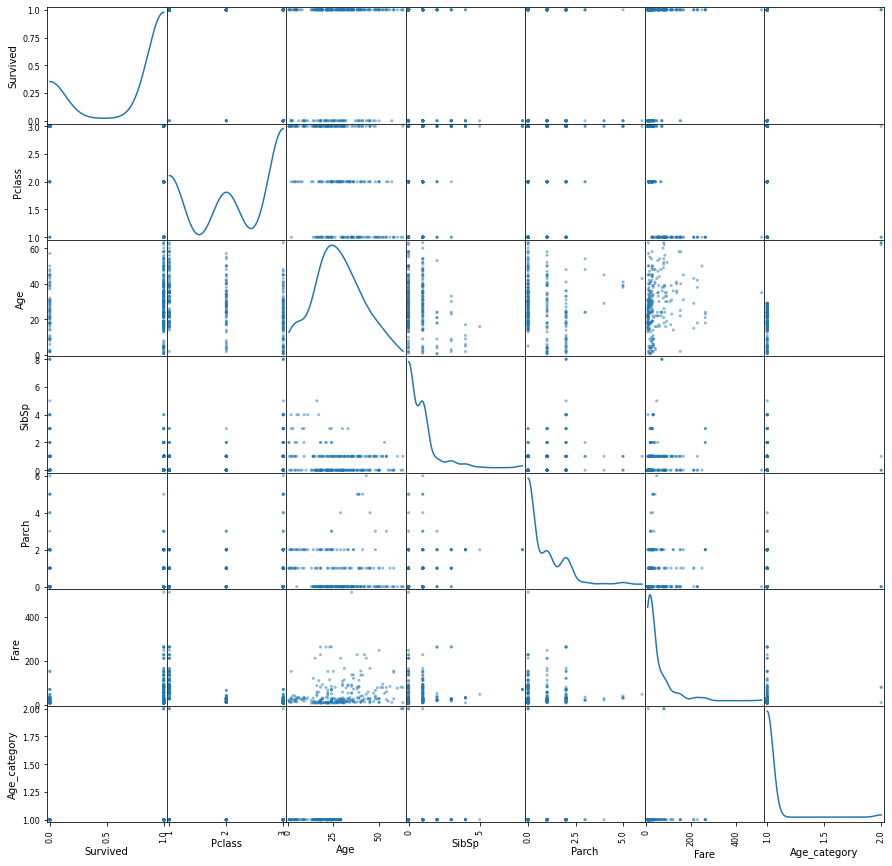

In [97]:
import matplotlib.pyplot as plt

pd.plotting.scatter_matrix(
    data[(data["Sex"] == "female")], figsize=(15, 15), diagonal="kde"
)
plt.show()

In [115]:
print("На борту было {} мужчин и {} женщин.".format(sum(data['Sex'] == 'male'), 
                                            sum(data['Sex'] == 'female')))

На борту было 577 мужчин и 314 женщин.


In [121]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [122]:
pd.crosstab(data['Pclass'], data['Sex'], margins=True)

Sex,female,male,All
Pclass,,,
1,94,122,216
2,76,108,184
3,144,347,491
All,314,577,891


In [123]:
first_names = data[data['Sex'] == 'male']['Name'].apply(lambda full_name: 
                full_name.split(',')[1].split()[1])
first_names.value_counts().head()

William    35
John       25
George     14
Thomas     13
Charles    13
Name: Name, dtype: int64

In [124]:
data[data['Sex'] == 'male']["Age"].mean() - data[data['Sex'] == 'female']["Age"].mean()

2.8109357793509417

In [145]:
print("Средний возраст мужчин в 1ом классе", data[(data['Sex'] == 'male') & (data["Pclass"] == 1)]["Age"].mean())
print("Средний возраст мужчин в 2ом классе", data[(data['Sex'] == 'male') & (data["Pclass"] == 2)]["Age"].mean())
print("Средний возраст мужчин в 3ем классе", data[(data['Sex'] == 'male') & (data["Pclass"] == 3)]["Age"].mean(), "\n")

print("Средний возраст женщин в 1ом классе", data[(data['Sex'] == 'female') & (data["Pclass"] == 1)]["Age"].mean())
print("Средний возраст женщин в 2ом классе", data[(data['Sex'] == 'female') & (data["Pclass"] == 2)]["Age"].mean())
print("Средний возраст женщин в 3ем классе", data[(data['Sex'] == 'female') & (data["Pclass"] == 3)]["Age"].mean())

Средний возраст мужчин в 1ом классе 41.28138613861386
Средний возраст мужчин в 2ом классе 30.74070707070707
Средний возраст мужчин в 3ем классе 26.507588932806325 

Средний возраст женщин в 1ом классе 34.61176470588235
Средний возраст женщин в 2ом классе 28.722972972972972
Средний возраст женщин в 3ем классе 21.75


In [156]:
pd.crosstab(data['Pclass'], data['Sex'], 
            values=data['Age'], aggfunc=np.mean)

Sex,female,male
Pclass,,
1,34.61,41.28
2,28.72,30.74
3,21.75,26.51


C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

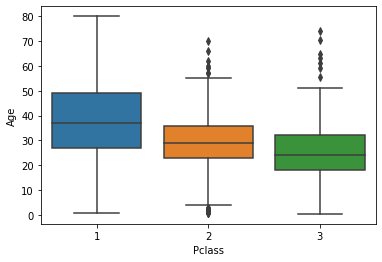

In [155]:
import seaborn as sns

sns.boxplot(data['Pclass'], data['Age'])

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='Age'>

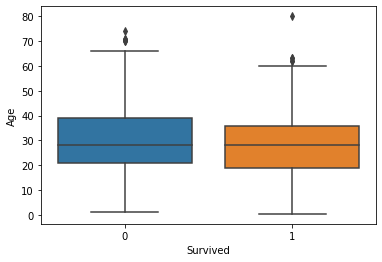

In [160]:
sns.boxplot(data['Survived'], data['Age'])

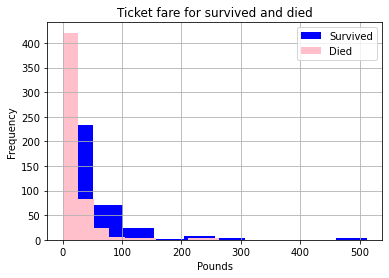

In [186]:
data[data['Survived'] == 1]['Fare'].hist(color="blue",
                                        label='Survived')
data[data['Survived'] == 0]['Fare'].hist(color="pink",
                                       label='Died')



plt.title('Ticket fare for survived and died')
plt.xlabel('Pounds')
plt.ylabel('Frequency')
plt.legend()